# Анализ воронки

## Описание
### Гипотеза 1

По идее, должна быть разница в поведении групп, которые проходят и не проходят обучение. Но так ли это? Влияет ли обучение на скорость прохождения других этапов игры?

### Гипотеза 2

Кажется, повторное прохождение обучения положительно влияет на оплату, верно?

### Гипотеза 3

Если пользователь сначала выбирает сложность, будет ли он потом проходить обучение?

### Этапы игры

- Регистрация
- Старт обучения (опционально)
- Завершение обучения (опционально)
- Выбор уровня сложности вопросов
- Выбор бесплатного пакета вопросов
- Покупка платных пакетов вопросов

### ЦЕЛЬ
Исследовать поведение пользователей в обновлённом приложении.

### ЗАДАЧИ
В рамках проверки гипотез вам необходимо решить три задачи:

- Определить, насколько обучение сокращает время прохождения этапов игры.
- Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.
- Определить, насколько прозрачен процесс взаимодействия с игрой.

### КОНКРЕТНЫЕ ШАГИ (ФОРМАЛИЗОВАННЫЕ ЗАДАЧИ)
- Сравнить время прохождения различных этапов для пользователей, которые завершили обучение, и пользователей, не начинавших обучение. Если показатель отличается, выяснить, насколько.
- Проверить, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые завершал пользователь. 
- Выяснить, как часто пользователи начинают обучение после выбора уровня сложности. (Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.)

## Чтение и подготовка данных

In [1]:
import pandas as pd # импортирование необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt

In [2]:
events = pd.read_csv('data/7_4_Events.csv') # чтение файла и отображение основной информации
display(events.head())
events.info()

,id,event_type,selected_level,start_time,tutorial_id,user_id
0,28903,registration,NaN,2016-05-11T23:40:55,NaN,12583
1,28904,registration,NaN,2016-05-11T23:49:58,NaN,12584
2,28905,registration,NaN,2016-05-12T00:53:07,NaN,12585
3,28906,tutorial_start,NaN,2016-05-12T01:32:20,17562.0,12585
4,28907,tutorial_finish,NaN,2016-05-12T01:34:53,17562.0,12585


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252334 entries, 0 to 252333
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              252334 non-null  int64  
 1   event_type      252334 non-null  object 
 2   selected_level  31086 non-null   object 
 3   start_time      252334 non-null  object 
 4   tutorial_id     125103 non-null  float64
 5   user_id         252334 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 11.6+ MB


In [3]:
mask1 = events['start_time'] >= '2018-01-01' # фильтрация данных пользователей, выбранных для анализа
mask2 = events['start_time'] < '2019-01-01'
mask3 = events['event_type'] == 'registration'
user_list = list(events[mask1 & mask2 & mask3]['user_id'])
events = events[events['user_id'].isin(user_list)]
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66959 entries, 51405 to 118364
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              66959 non-null  int64  
 1   event_type      66959 non-null  object 
 2   selected_level  8342 non-null   object 
 3   start_time      66959 non-null  object 
 4   tutorial_id     32954 non-null  float64
 5   user_id         66959 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.6+ MB


In [4]:
purchases = pd.read_csv('data/purchase.csv') # чтение файла и отображение основной информации
display(purchases.head())
purchases.info()

,id,user_id,event_datetime,amount
0,15674,12584,2016-05-12T10:34:16,100
1,15675,12985,2016-05-13T08:25:56,50
2,15676,12828,2016-05-13T16:33:46,50
3,15677,12598,2016-05-14T01:09:37,150
4,15678,13037,2016-05-14T01:24:46,100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956 entries, 0 to 5955
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              5956 non-null   int64 
 1   user_id         5956 non-null   int64 
 2   event_datetime  5956 non-null   object
 3   amount          5956 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 186.2+ KB


In [5]:
purchases = purchases[purchases['user_id'].isin(user_list)] # фильтрация данных пользователей, выбранных для анализа
purchases.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 1171 to 2778
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1600 non-null   int64 
 1   user_id         1600 non-null   int64 
 2   event_datetime  1600 non-null   object
 3   amount          1600 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.5+ KB


In [6]:
purchases['event_type'] = 'purchase' # создание типа события покупка для дальнейшего объединения датафреймов

In [7]:
events = events.rename(columns={"id": "event_id"}) 
purchases = purchases.rename(columns={"id": "purchase_id", "event_datetime": "start_time"})

# переименование столбцов, чтобы избежать путаницы при объединении

In [8]:
total_events = pd.concat([events,purchases],sort=False) # объединение датафреймов

total_events.head()

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount
51405,80308.0,registration,NaN,2018-01-01T03:48:40,NaN,27832,NaN,NaN
51406,80309.0,registration,NaN,2018-01-01T04:07:25,NaN,27833,NaN,NaN
51407,80310.0,registration,NaN,2018-01-01T08:35:10,NaN,27834,NaN,NaN
51408,80311.0,registration,NaN,2018-01-01T11:54:47,NaN,27835,NaN,NaN
51409,80312.0,registration,NaN,2018-01-01T13:28:07,NaN,27836,NaN,NaN


In [9]:
total_events.info() # отображение информации об объединенном датафрейме

<class 'pandas.core.frame.DataFrame'>
Index: 68559 entries, 51405 to 2778
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   event_id        66959 non-null  float64
 1   event_type      68559 non-null  object 
 2   selected_level  8342 non-null   object 
 3   start_time      68559 non-null  object 
 4   tutorial_id     32954 non-null  float64
 5   user_id         68559 non-null  int64  
 6   purchase_id     1600 non-null   float64
 7   amount          1600 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.7+ MB


In [10]:
total_events = total_events.reset_index(drop=True).sort_values('start_time') # reseting indexes and sorting

total_events.head()

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount
0,80308.0,registration,NaN,2018-01-01T03:48:40,NaN,27832,NaN,NaN
1,80309.0,registration,NaN,2018-01-01T04:07:25,NaN,27833,NaN,NaN
2,80310.0,registration,NaN,2018-01-01T08:35:10,NaN,27834,NaN,NaN
3,80311.0,registration,NaN,2018-01-01T11:54:47,NaN,27835,NaN,NaN
4,80312.0,registration,NaN,2018-01-01T13:28:07,NaN,27836,NaN,NaN


## Проверка первой гипотезы

In [11]:
users_finished_tutorial = total_events[total_events['event_type'] == 'tutorial_finish']['user_id'].unique()

users_finished_tutorial # поиск пользователей, которые закончили обучение

array([27835, 27836, 27833, ..., 47753, 47755, 47756])

In [12]:
users_started_tutorial = total_events[total_events['event_type'] == 'tutorial_start']['user_id'].unique()


users_started_tutorial # поиск пользователей, которые начали обучение

array([27836, 27835, 27833, ..., 47753, 47755, 47756])

In [13]:
users = total_events['user_id'].unique()

users # поиск уникальных пользователей

array([27832, 27833, 27834, ..., 47755, 47756, 47757])

In [14]:
users_not_started_tutorial = np.setdiff1d(users, users_started_tutorial)



users_not_started_tutorial # поиск пользователей, которые не начали обучение

array([27832, 27837, 27838, ..., 47752, 47754, 47757])

In [15]:
total_events['tutorial'] = 'not finished' 

# Установка значений по умолчанию для всех строк

total_events.loc[total_events['user_id'].isin(users_finished_tutorial), 'tutorial'] = 'finished'  

# Обновление строк, в которых находятся пользователи, закончившие обучение

total_events.loc[total_events['user_id'].isin(users_not_started_tutorial), 'tutorial'] = 'not_started' 

# Обновление строк, в которых находятся пользователи, не начинавшие обучение

total_events.head()


,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount,tutorial
0,80308.0,registration,NaN,2018-01-01T03:48:40,NaN,27832,NaN,NaN,not_started
1,80309.0,registration,NaN,2018-01-01T04:07:25,NaN,27833,NaN,NaN,finished
2,80310.0,registration,NaN,2018-01-01T08:35:10,NaN,27834,NaN,NaN,finished
3,80311.0,registration,NaN,2018-01-01T11:54:47,NaN,27835,NaN,NaN,finished
4,80312.0,registration,NaN,2018-01-01T13:28:07,NaN,27836,NaN,NaN,finished


In [16]:
total_events['start_time'] = pd.to_datetime(total_events.start_time) # преобразование времени начала событий в формат даты

In [17]:
registration = total_events[total_events['event_type'] == 'registration'] 

# этот датафрейм будет вспомогательным для определения времени между регистрацией и началом обучения

In [18]:
registration = registration[["user_id", "start_time"]].rename(
    columns={"start_time": "registration_time"}
)

# оставим только необходимые столбцы и переименуем их для ясности

In [19]:
level_choice = total_events[total_events["event_type"] == "level_choice"]
level_choice = level_choice[["user_id", "start_time", "tutorial"]].rename(
    columns={"start_time": "level_choice_time"}
)
merged = registration.merge(level_choice, on="user_id", how="inner")
merged["timedelta"] = (
    merged["level_choice_time"] - merged["registration_time"]
)
merged # вычисление временной дельты между двумя событиями для каждого пользователя


,user_id,registration_time,level_choice_time,tutorial,timedelta
0,27835,2018-01-01 11:54:47,2018-01-01 20:37:22,finished,0 days 08:42:35
1,27839,2018-01-01 18:24:01,2018-01-01 22:37:50,finished,0 days 04:13:49
2,27840,2018-01-01 20:53:21,2018-01-02 05:18:42,not finished,0 days 08:25:21
3,27842,2018-01-01 23:18:46,2018-01-02 08:46:03,finished,0 days 09:27:17
4,27843,2018-01-02 00:02:28,2018-01-02 14:09:58,finished,0 days 14:07:30
...,...,...,...,...,...
8337,47744,2018-12-30 22:12:24,2018-12-31 07:53:04,finished,0 days 09:40:40
8338,47747,2018-12-31 03:01:17,2018-12-31 12:24:40,finished,0 days 09:23:23
8339,47753,2018-12-31 18:58:55,2018-12-31 22:36:19,finished,0 days 03:37:24
8340,47755,2018-12-31 21:15:14,2019-01-01 05:04:52,finished,0 days 07:49:38


In [20]:
res1 = pd.pivot_table(merged, columns='tutorial', values='timedelta', aggfunc='mean')

res1 # вычисление средней временной дельты для каждой категории прохождения обучения

tutorial,finished,not finished,not_started
timedelta,0 days 07:05:36.854819357,0 days 08:12:57.551816958,0 days 05:15:33.122448979


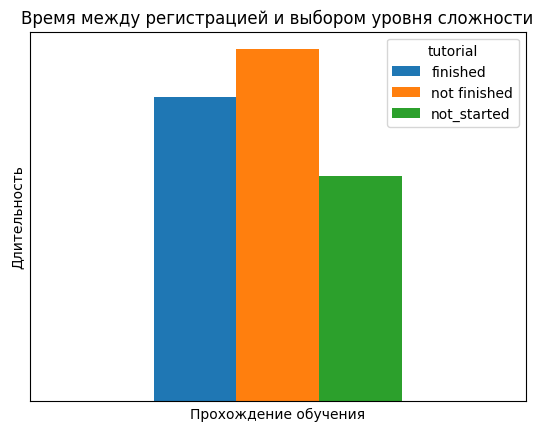

In [21]:
# построение столбчатой диаграммы
ax = res1.plot.bar()

# установка заголовка и названий осей
ax.set_title('Время между регистрацией и выбором уровня сложности')
ax.set_xlabel('Прохождение обучения')
ax.set_ylabel('Длительность')
ax.set_yticks([])
ax.set_xticks([])

# отображение диаграммы
plt.show()

Данный график и таблица выше показывают, что у тех кто не начинал обучение время между регистрацией и выбором сложности занчительно ниже (более чем на 2 часа). Это обусловлено самим прохождением обучения в течение данного срока

In [22]:
pack_choice = total_events[total_events["event_type"] == "pack_choice"]
print(pack_choice["user_id"].value_counts().mean())
pack_choice = pack_choice[["user_id", "start_time"]].rename(
    columns={"start_time": "pack_choice_time"}
)
merged_2 = level_choice.merge(pack_choice, on="user_id", how="inner")
merged_2["timedelta"] = (
    merged_2["pack_choice_time"] - merged_2["level_choice_time"]
)
merged_2 # вычисление временной дельты между двумя событиями для каждого пользователя

1.0


,user_id,level_choice_time,tutorial,pack_choice_time,timedelta
0,27835,2018-01-01 20:37:22,finished,2018-01-01 20:38:43,0 days 00:01:21
1,27839,2018-01-01 22:37:50,finished,2018-01-01 22:42:54,0 days 00:05:04
2,27845,2018-01-02 06:19:18,finished,2018-01-02 06:25:12,0 days 00:05:54
3,27849,2018-01-02 11:53:11,finished,2018-01-02 11:59:26,0 days 00:06:15
4,27843,2018-01-02 14:09:58,finished,2018-01-02 14:14:51,0 days 00:04:53
...,...,...,...,...,...
5732,47742,2018-12-31 04:58:15,finished,2018-12-31 05:06:10,0 days 00:07:55
5733,47744,2018-12-31 07:53:04,finished,2018-12-31 07:59:18,0 days 00:06:14
5734,47732,2018-12-31 09:59:00,finished,2018-12-31 10:05:18,0 days 00:06:18
5735,47753,2018-12-31 22:36:19,finished,2018-12-31 22:38:05,0 days 00:01:46


In [23]:
res2 = pd.pivot_table(merged_2, columns='tutorial', values='timedelta', aggfunc='mean')

res2 # вычисление средней временной дельты для каждой категории прохождения обучения

tutorial,finished,not finished,not_started
timedelta,0 days 00:05:18.146058732,0 days 00:05:05.295687885,0 days 00:05:23.824324324


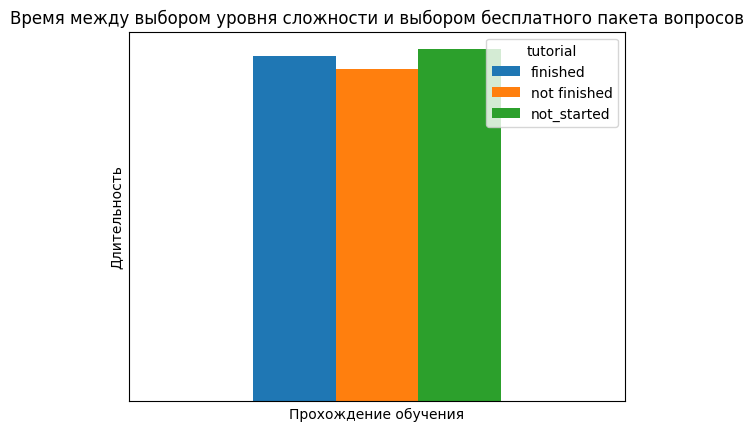

In [24]:
# построение столбчатой диаграммы
ax = res2.plot.bar()

# установка заголовка и названий осей
ax.set_title('Время между выбором уровня сложности и выбором бесплатного пакета вопросов')
ax.set_xlabel('Прохождение обучения')
ax.set_ylabel('Длительность')
ax.set_yticks([])
ax.set_xticks([])

# отображение диаграммы
plt.show()

Данный график и таблица выше показывают, что независимо от прохождения обучения время между выбором уровня сложности и выбором бесплатного пакета вопросов составляет около 5 часов, а разница между пользователями прошедшими обучение и не начинавшими его составляет всего около 5 минут и является незначительной

In [25]:
purchase = total_events[total_events["event_type"] == "purchase"]
print(purchase["user_id"].value_counts().mean())
purchase = purchase[["user_id", "start_time", "tutorial"]].rename(
    columns={"start_time": "purchase_time"}
)
merged_3 = pack_choice.merge(purchase, on="user_id", how="inner")
merged_3["timedelta"] = (
    merged_3["purchase_time"] - merged_3["pack_choice_time"])
    
merged_3 # вычисление временной дельты между двумя событиями для каждого пользователя

1.0


,user_id,pack_choice_time,purchase_time,tutorial,timedelta
0,27845,2018-01-02 06:25:12,2018-01-03 18:53:43,finished,1 days 12:28:31
1,27865,2018-01-04 06:03:20,2018-01-04 14:46:10,not finished,0 days 08:42:50
2,27884,2018-01-04 16:22:03,2018-01-08 19:37:34,finished,4 days 03:15:31
3,27910,2018-01-05 12:05:28,2018-01-07 12:11:34,finished,2 days 00:06:06
4,27911,2018-01-05 17:40:37,2018-01-07 08:19:12,not finished,1 days 14:38:35
...,...,...,...,...,...
1595,47659,2018-12-29 05:14:54,2018-12-31 17:13:54,finished,2 days 11:59:00
1596,47687,2018-12-29 11:41:30,2018-12-30 09:05:28,finished,0 days 21:23:58
1597,47712,2018-12-29 22:48:15,2018-12-31 09:05:20,finished,1 days 10:17:05
1598,47742,2018-12-31 05:06:10,2019-01-04 12:51:41,finished,4 days 07:45:31


In [26]:
res3 = pd.pivot_table(merged_3, columns='tutorial', values='timedelta', aggfunc='mean')

res3 # вычисление средней временной дельты для каждой категории прохождения обучения

tutorial,finished,not finished,not_started
timedelta,3 days 17:17:59.641326883,3 days 21:14:46.908396946,4 days 04:49:33.590909090


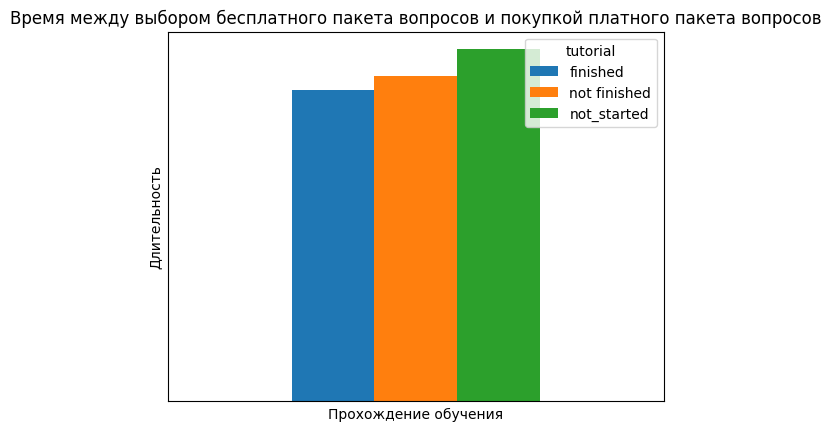

In [27]:
# построение столбчатой диаграммы
ax = res3.plot.bar()

# установка заголовка и названий осей
ax.set_title('Время между выбором бесплатного пакета вопросов и покупкой платного пакета вопросов')
ax.set_xlabel('Прохождение обучения')
ax.set_ylabel('Длительность')
ax.set_yticks([])
ax.set_xticks([])

# отображение диаграммы
plt.show()

Данный график и таблица выше показывают, что независимо от прохождения обучения время между выбором бесплатного пакета вопросов и покупкой платного пакета вопросов составляет около 4 дней, а разница между пользователями прошедшими обучение и не начинавшими его составляет всего около 11 часов и является незначительной

### Вывод

Прохождение обучения незначительно влияет на прохождение этапов. Заметная разница была только на том этапе между которыми и должно происходить обучение

## Проверка второй гипотезы

In [28]:
user_tutorial_finish_count = total_events[total_events['event_type'] == 'tutorial_finish'].groupby(['user_id'])['event_type'].count()

user_tutorial_finish_count # подсчет событий завершения обучения для каждого пользователя

user_id
27833    1
27834    1
27835    1
27836    1
27839    1
        ..
47748    1
47751    1
47753    1
47755    1
47756    1
Name: event_type, Length: 10250, dtype: int64

In [29]:
total_events = total_events.merge(user_tutorial_finish_count, how='left', on='user_id')

total_events.rename(columns={'event_type_y': 'tutorial_count', 'event_type_x':'event_type'}, inplace=True) 
 
total_events['tutorial_count'] = total_events['tutorial_count'].fillna(0).astype(int)

total_events # добавление количества пройденных обучений к датафрейму total_events и заполнение пропущенных значений нулями

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount,tutorial,tutorial_count
0,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN,not_started,0
1,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN,finished,1
2,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN,finished,1
3,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN,finished,1
4,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN,finished,1
...,...,...,...,...,...,...,...,...,...,...
68554,NaN,purchase,NaN,2019-01-02 03:48:19,NaN,47498,18441.0,100.0,finished,1
68555,NaN,purchase,NaN,2019-01-02 23:26:26,NaN,47647,18442.0,150.0,finished,1
68556,NaN,purchase,NaN,2019-01-03 00:36:36,NaN,47554,18443.0,50.0,finished,1
68557,NaN,purchase,NaN,2019-01-04 12:51:41,NaN,47742,18448.0,50.0,finished,1


In [30]:
hyp2 = total_events.groupby('tutorial_count')['purchase_id'].count()

hyp2 # подсчет покупок для каждого количества пройденных обучений

tutorial_count
0     153
1    1143
2     182
3      44
4      19
5      19
6      15
7      15
8       6
9       4
Name: purchase_id, dtype: int64

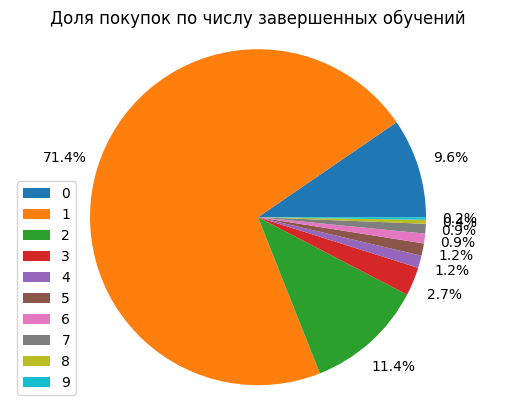

In [31]:
plt.pie(hyp2, autopct='%1.1f%%', pctdistance=1.2) # круговая диаграмма количетсва покупок на количество пройденных обучений
plt.title('Доля покупок по числу завершенных обучений')
plt.axis('equal')

plt.legend(labels='0123456789', loc='lower left')
plt.show()


### Вывод
Данный график и таблица выше показывают, что больше 70% покупок совершается пользователями прошедшими только одно обучение, пользователи прошедшие больше одного обучения совершают значительно меньше покупок

## Проверка третьей гипотезы

In [32]:
pivot = pd.pivot_table(total_events, values='start_time', index='user_id', columns='event_type', aggfunc = max)

pivot # сводная таблица максимального времени начала события для каждого пользователя и типа события

event_type,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start
user_id,,,,,,
27832,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT
27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40
27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11
27835,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51
27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 15:40:43
...,...,...,...,...,...,...
47753,2018-12-31 22:36:19,2018-12-31 22:38:05,NaT,2018-12-31 18:58:55,2018-12-31 20:57:07,2018-12-31 20:54:56
47754,NaT,NaT,NaT,2018-12-31 19:14:08,NaT,NaT
47755,2019-01-01 05:04:52,NaT,NaT,2018-12-31 21:15:14,2019-01-01 00:09:30,2019-01-01 00:08:14


In [33]:
pivot['tutorial_after_level_choice'] = (pivot['tutorial_start'] - pivot['level_choice'])/pd.Timedelta("1 second")

user_tutorial_after_level_choice_count = pivot[pivot['tutorial_after_level_choice'] > 0].index.nunique()

user_tutorial_after_level_choice_count # количество пользователей, которые начали обучение после выбора уровня сложности

1386

In [34]:
round(user_tutorial_after_level_choice_count / users.shape[0] * 100, 2) 

# процент пользователей, которые начали обучение после выбора уровня сложности

6.96

### Вывод

Процент пользователей, начинавших обучение после выбора уровня сложности минимален, а значит, большинству понятен процесс работы с приложением

## Общие выводы
В процессе анализа исходных данных были опровергнуты все три гипотезы: прохождение обучения незначительно влияет на скорость прохождения этапов, его повторное прохождение не увеличивает числа покупок, и пользователи редко начинают его после выбора уровня сложности. Числовые подтверждения представлены в выводах по разделам